# Project Foundations for Data Science: FoodHub Data Analysis

**Marks: 40**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [ ]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [ ]:
# Run the following lines for Google Colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# read the data
df = pd.read_csv('/content/drive/MyDrive/Python Course/Foundations of DS/foodhub_order.csv')
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data?

In [ ]:
print(df.ndim) # returns the dimensions of the data frame
print(df.shape) # returns the (rows,columns) in the data frame
print(df.size) # returns the total number of elements in the data frame

2
(1898, 9)
17082


#### Observations:

Based on the detail taken from the operation we can see:
* 1898 entries or rows
* 9 columns


### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used)

In [ ]:
# Use info() to print a concise summary of the DataFrame

df.info() # the function returns insight into the different types for each column, including insight into potential null elements


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:

For each of the 9 columns we can see that there are no null or missing elements.

We can also see that of the 9 columns, 5 are numerical and 4 are pandas objects or categorical elements:
* float = cost_of_the_order
* integer = order_id, customer_id, food_preparation_time, delivery_time
* pandas object = restaurant_name, cuisine_type, day_of_the_week, rating

From the quick analysis of the first 5 lines we can see that the elements in 'rating' are either numerical values or strings, namely "Not given".

### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method

In [ ]:
# use the isnull() function to return whether there are values missing (True) or not (False)
df.isnull().values.any()

False

#### Observations:

From the info() function we could see that each of the columns have 1898 non-null variables in the dataset. Knowing that there are only 1898 rows, we can infer that there are no missing values in the data set.

To confirm, we can use the isnull() function combined with the values.any() function to find that there are no null values across the entire data frame.

### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed?

In [ ]:
# Write your code here

df.describe() # this code will return the summary statistics for all of the columns in the set

,order_id,customer_id,cost_of_the_order,food_preparation_time,delivery_time
count,1.898000e+03,1898.000000,1898.000000,1898.000000,1898.000000
mean,1.477496e+06,171168.478398,16.498851,27.371970,24.161749
std,5.480497e+02,113698.139743,7.483812,4.632481,4.972637
min,1.476547e+06,1311.000000,4.470000,20.000000,15.000000
25%,1.477021e+06,77787.750000,12.080000,23.000000,20.000000
50%,1.477496e+06,128600.000000,14.140000,27.000000,25.000000
75%,1.477970e+06,270525.000000,22.297500,31.000000,28.000000
max,1.478444e+06,405334.000000,35.410000,35.000000,33.000000


In [ ]:
df['food_preparation_time'].describe().to_frame() # this code allows us to filter to only the relevant information to answer the question

,food_preparation_time
count,1898.000000
mean,27.371970
std,4.632481
min,20.000000
25%,23.000000
50%,27.000000
75%,31.000000
max,35.000000


#### Observations:

* Minimum: 20 mins
* Average: 27.37 mins
* Maximum: 35 mins

According to the summary statistics we can see that the food preparation time across the sample is between 20 - 35 minutes.

Both the mean and the median are around the 27 minute marker so we can expect the †he distribution to be more normally distributed with minimal skew to the right as the mean is larger than the median.

### **Question 5:** How many orders are not rated?

In [ ]:
# Write the code here

rdf = df['rating'].value_counts().to_frame() # create a new data frame with only the ratings
sum = rdf['rating'].sum() # create an array summing the total for each rating
rdf['r_percent'] = (rdf['rating']/sum)*100 # find the percentage for each rating over the total
rdf

,rating,r_percent
Not given,736,38.777661
5,588,30.979979
4,386,20.337197
3,188,9.905163


In [ ]:
print('There were',rdf.iloc[0,0],'orders not rated.') # find the number of ratings that were not given

There were 736 orders not rated.


#### Observations

Based on the data set we can see that in about 38.8% of orders there was no rating given. As this accounts for a significant portion of the sample this reduces the confidence of the insights that we can gather from this category.

Looking at the rows in the data frame we can see that the ratings given are between 5 - 3. As these ratings lean more towards the positive, we could investigate further to understand if people who would like to give a negative rating would rather not give one instead. As the lack of ratings account for such a high percentage of the data set, it stands out as an area that could be further studied to understand why customers skip providing that feedback.

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration)

Based on our univariate analysis we can see the following observations for each variable:
* ***Order ID*** = The order ID variable has a unique value for each entry. As such there is a uniform distribution across the data set. Although we can not draw insights from this variable in this specific data sheet, we can use the Order ID for mapping purposes with other data sets.

* ***Customer ID*** = The customer ID variable shows a right skewed multi-modal distribution. We can further investigate the reasons for the modes and skews depending on how customer IDs are assigned. One possible insight that can be further analyzed is the reason for the right skew, which can be due to the length of the time that people have been using the service and the amount of orders that each customer has placed. We can use this information to understand customer satisfaction and retention / attrition.

* ***Food preparation time*** = The food preparation time has a multimodal distribution with a few modes in the data, largely concentrated around bins 5 minutes apart. To further understand this distribution we could further understand the ways that the vendors plan for and prepare orders.

* ***Delivery Time*** = Delivery time distribution has a left skew. Since the food preparation time had a less variable distribution pattern, this may be an area of interest to understand why a higher tendency around the longer delivery times. If we could get additional variables such as distance, time of day, etc. we could draw stronger conclusions on where efficiencies can be found in the data.

* ***Restaurant Name*** = Based on the distribution of the restaurant name bar graph we can see that there are restaurants that are clear favorites among the customer base and have received a higher percentage of orders. We can use this information to understand customer preferences and further hone in on the success metrics of the high volumes and the improvement opportunities of the low volumes.

* ***Cost*** = Based on the distribution of the data we can see a right skew on the cost of orders. There is a significant proportion of orders under the $20. Taking this into account, we know that opportunities for growth would involve implementing strategies to increase the cost of orders, or understanding how to facilitate the increase of the volume of these lower value orders.

* ***Cuisine Type*** = Based on the distribution of the data in the bar graph, we can see that there are preferences among customers on the type of food ordered. Cultural preferences and quality of travel of the food may be areas that can be explored from the outcomes of this graph. American food, the most popular, may be seeing this demand due to comfort food nature, which can be desirable from a delivery service. Japanese, the second most popular, may be due to the lack of quality lost during travel as sushi is consumed cold as opposed to other types of food that are more desirable hot. Additionally, cultural preferences and habits may be in play as French food may be more typically reserved for a special night out.

* ***Day of the Week*** = From the data we can see that customers prefer placing orders over the weekend than the weekdays. This disproportionate amount of orders on the weekend is significant since there are more days for customers to place orders during the week. This represents an opportunity to increase orders during the week, but it also gives us an opportunity to understand customer habits during the weekend, when there may be greater appetite for spend.

#### Order ID

<Axes: xlabel='order_id', ylabel='Count'>

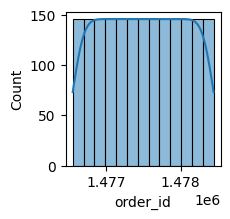

In [ ]:
plt.figure(figsize=(2,2))
sns.histplot(data = df, x='order_id', kde=True)

<Axes: xlabel='order_id'>

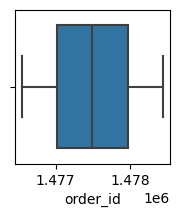

In [ ]:
plt.figure(figsize=(2,2))
sns.boxplot(data = df, x='order_id')

#### Customer ID

<Axes: xlabel='customer_id', ylabel='Count'>

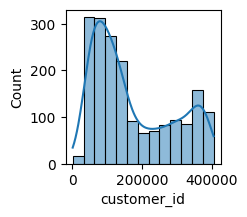

In [ ]:
plt.figure(figsize=(2,2))
sns.histplot(data = df, x='customer_id',kde=True)

<Axes: xlabel='customer_id'>

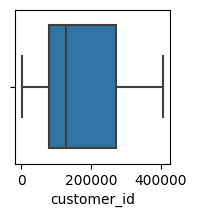

In [ ]:
plt.figure(figsize=(2,2))
sns.boxplot(data = df, x='customer_id')

#### Food Preparation Time

<Axes: xlabel='food_preparation_time', ylabel='Count'>

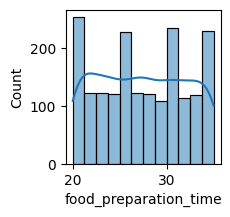

In [ ]:
plt.figure(figsize=(2,2))
sns.histplot(data = df, x='food_preparation_time', kde = True)

<Axes: xlabel='food_preparation_time'>

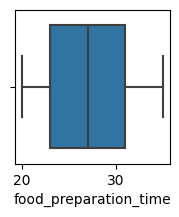

In [ ]:
plt.figure(figsize=(2,2))
sns.boxplot(data = df, x='food_preparation_time')

#### Delivery Time

<Axes: xlabel='delivery_time', ylabel='Count'>

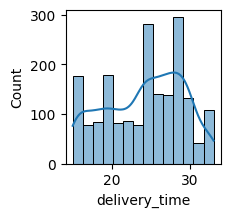

In [ ]:
plt.figure(figsize=(2,2))
sns.histplot(data = df, x='delivery_time', kde=True)

<Axes: xlabel='delivery_time'>

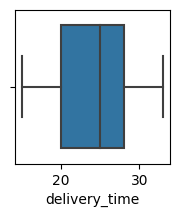

In [ ]:
plt.figure(figsize=(2,2))
sns.boxplot(data = df, x='delivery_time')

#### Cost

<Axes: xlabel='cost_of_the_order', ylabel='Count'>

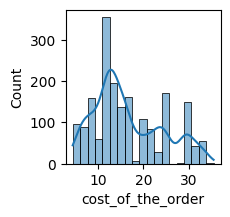

In [ ]:
plt.figure(figsize=(2,2))
sns.histplot(data = df, x='cost_of_the_order', kde=True)

<Axes: xlabel='cost_of_the_order'>

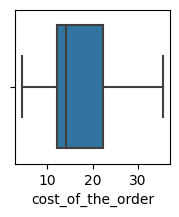

In [ ]:
plt.figure(figsize=(2,2))
sns.boxplot(data = df, x='cost_of_the_order')

#### Restaurant Name

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 140 (\x8c) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 142 (\x8e) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 140 (\x8c) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 142 (\x8e) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


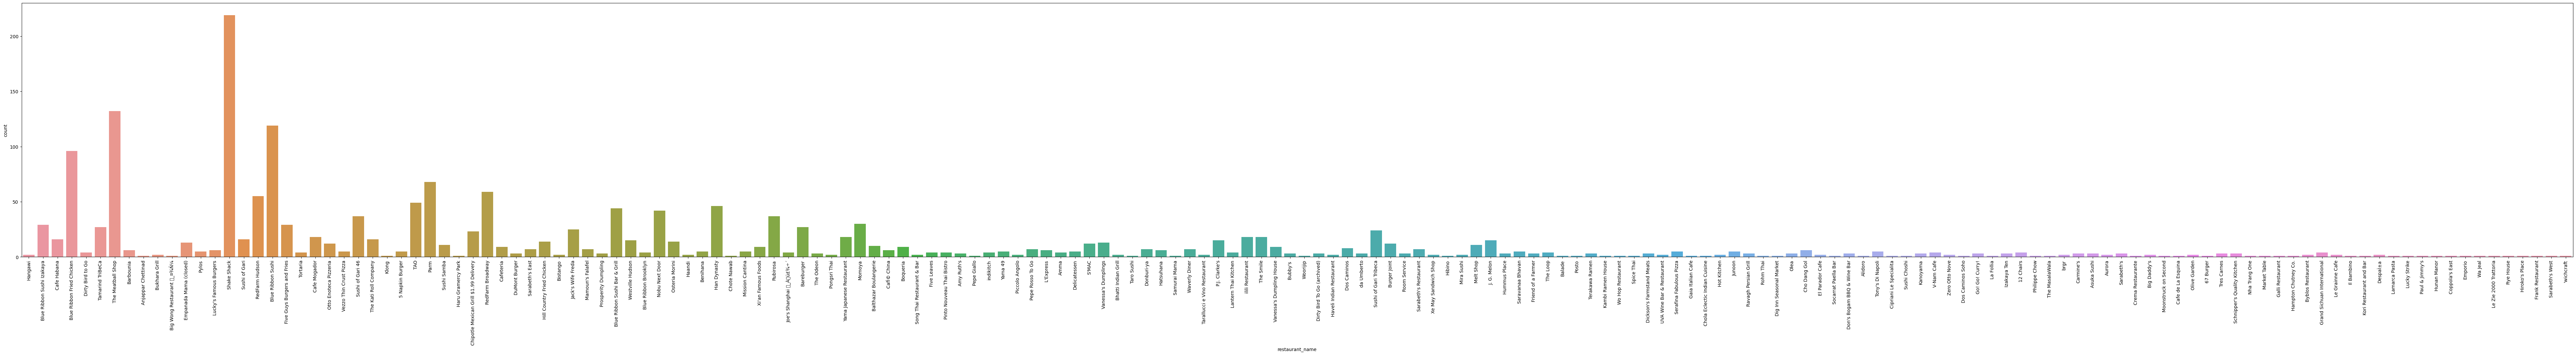

In [ ]:
plt.figure(figsize=(100,10))
plt.xticks(rotation=90)
sns.countplot(data = df, x='restaurant_name');

#### Cuisine Type

<Axes: xlabel='count', ylabel='cuisine_type'>

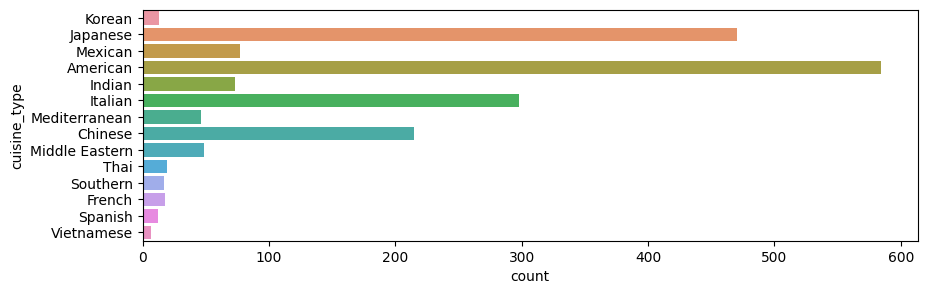

In [ ]:
plt.figure(figsize=(10,3))
sns.countplot(data = df, y='cuisine_type')

#### Day of the Week

<Axes: xlabel='day_of_the_week', ylabel='count'>

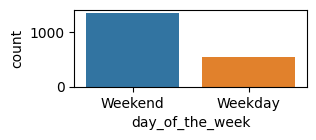

In [ ]:
plt.figure(figsize=(3,1))
sns.countplot(data = df, x='day_of_the_week')

#### Rating

<Axes: xlabel='rating', ylabel='count'>

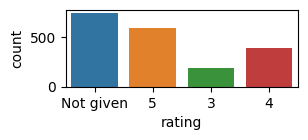

In [ ]:
plt.figure(figsize=(3,1))
sns.countplot(data = df, x='rating')

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received?

In [ ]:
rest = df['restaurant_name'].value_counts().to_frame() # create a data frame of the restaurants and the counts
rest.head()

,restaurant_name
Shake Shack,219
The Meatball Shop,132
Blue Ribbon Sushi,119
Blue Ribbon Fried Chicken,96
Parm,68


#### Observations:

Per the table above, the top five restaurants are: Shake Shack, The Meatball Shop, Blue Ribbon Sushi, Blue Ribbon Fried Chicken, and Parm.

The top restaurant, Shake Shack, recevies a significantly higher proportion of orders than even the second most popular. This tells us that there is an opportunity to understand what are the success factors of this restaurant and how to implement some of those at the other restaurants.

### **Question 8**: Which is the most popular cuisine on weekends?

<Axes: xlabel='day_of_the_week', ylabel='count'>

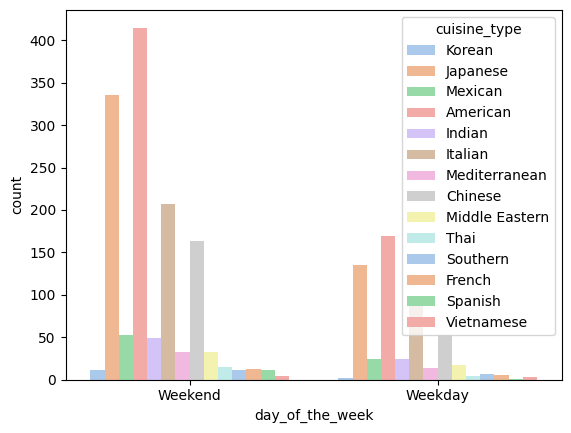

In [ ]:
sns.countplot(data = df, x = 'day_of_the_week', hue = 'cuisine_type', palette = 'pastel')

#### Observations:

The most popular cuisine on the weekends is American, as seen in the bar chart above.

### **Question 9**: What percentage of the orders cost more than 20 dollars?

In [ ]:
more_20 = len(df[df['cost_of_the_order']>20].value_counts().to_frame())/1898 #find the length of a data frame that only includes cost >20 and divide by the total order amount
print("%.2f%% of orders cost more than $20." % (more_20*100)) # print the answer in % format

29.24% of orders cost more than $20.


#### Observations:

29% of orders cost more than $20. As such, The majority of orders are 20 and under which limits the revenues per order that FoodHub is making. As previously mentioned there is an opportunity to increase the price of each order placed to grow revenues.

### **Question 10**: What is the mean order delivery time?

In [ ]:
df['delivery_time'].mean() # returns the mean of the delivery time variable

24.161749209694417

#### Observations:

The mean order delivery time is 24.16 minutes.

### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed

In [ ]:
top_customers = df['customer_id'].value_counts().to_frame() # create a data fram of the counts of customer IDs - automatically in descending order
top_customers.head(3) # returns the top 3 entries

,customer_id
52832,13
47440,10
83287,9


#### Observations:

The top three of FoodHub's customers are 52832, 47440, and 83287. These customers ordered 13, 10, and 9 orders respectively.


### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables)

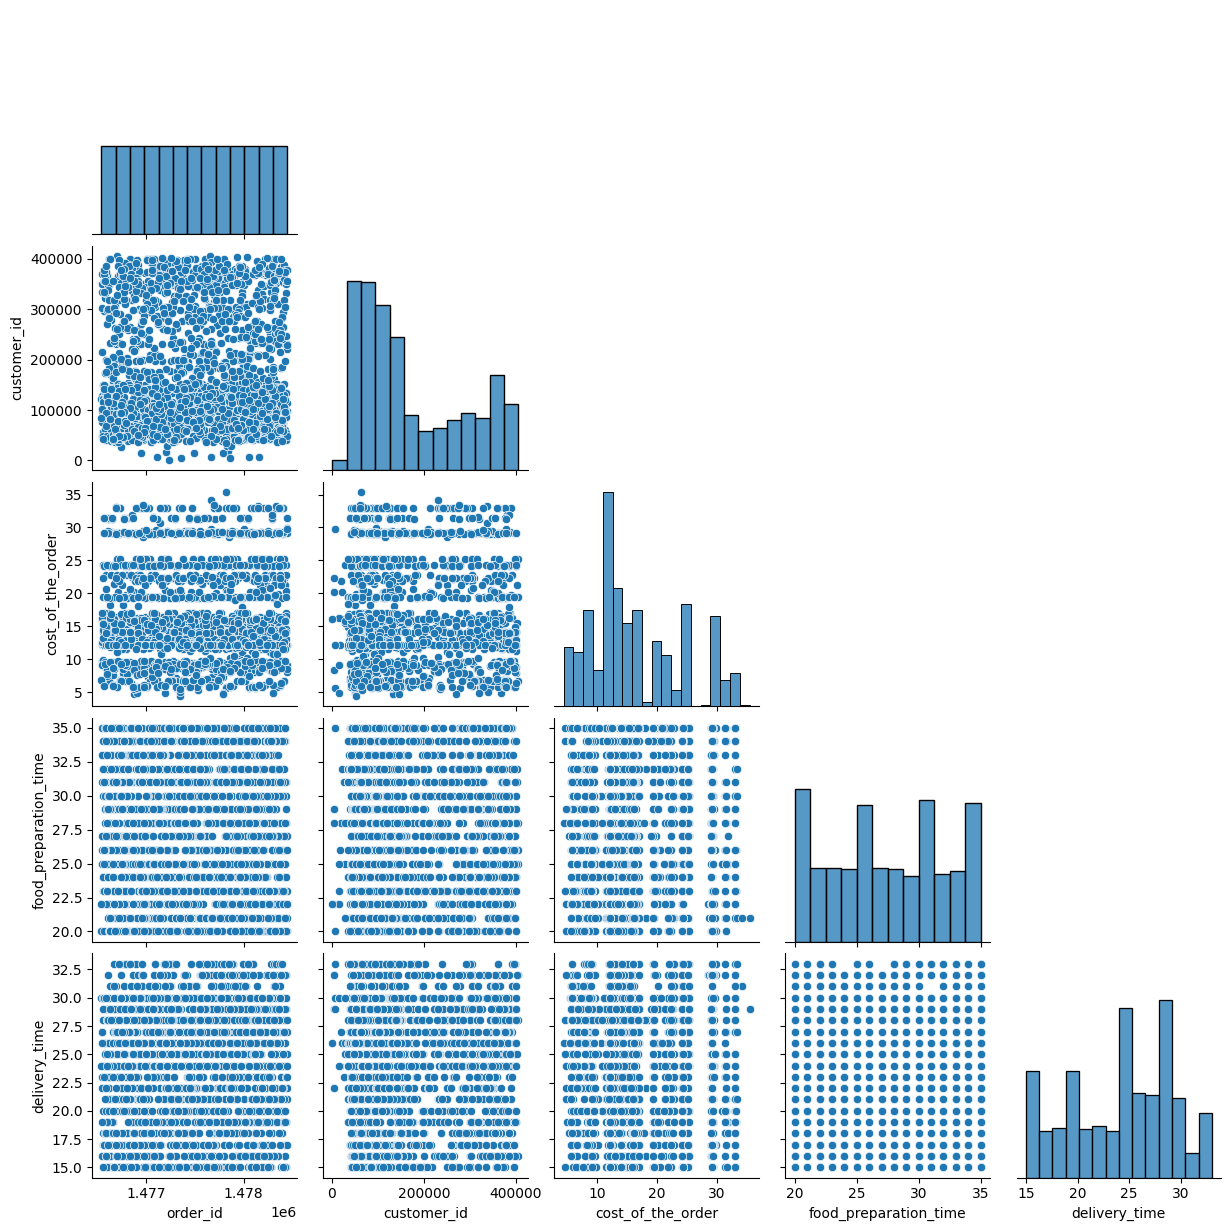

In [ ]:
sns.pairplot(data = df, corner = True) # compares the distributions and correlations of numerical variables against each other


Observations:

Based on the outputs of the pair plot, we can see that there do not appear to be significant correlations between the numerical variables of the full data set, not taking into account the possible segmentation of some categorical variables.

These variables appear to be more independent of each other.

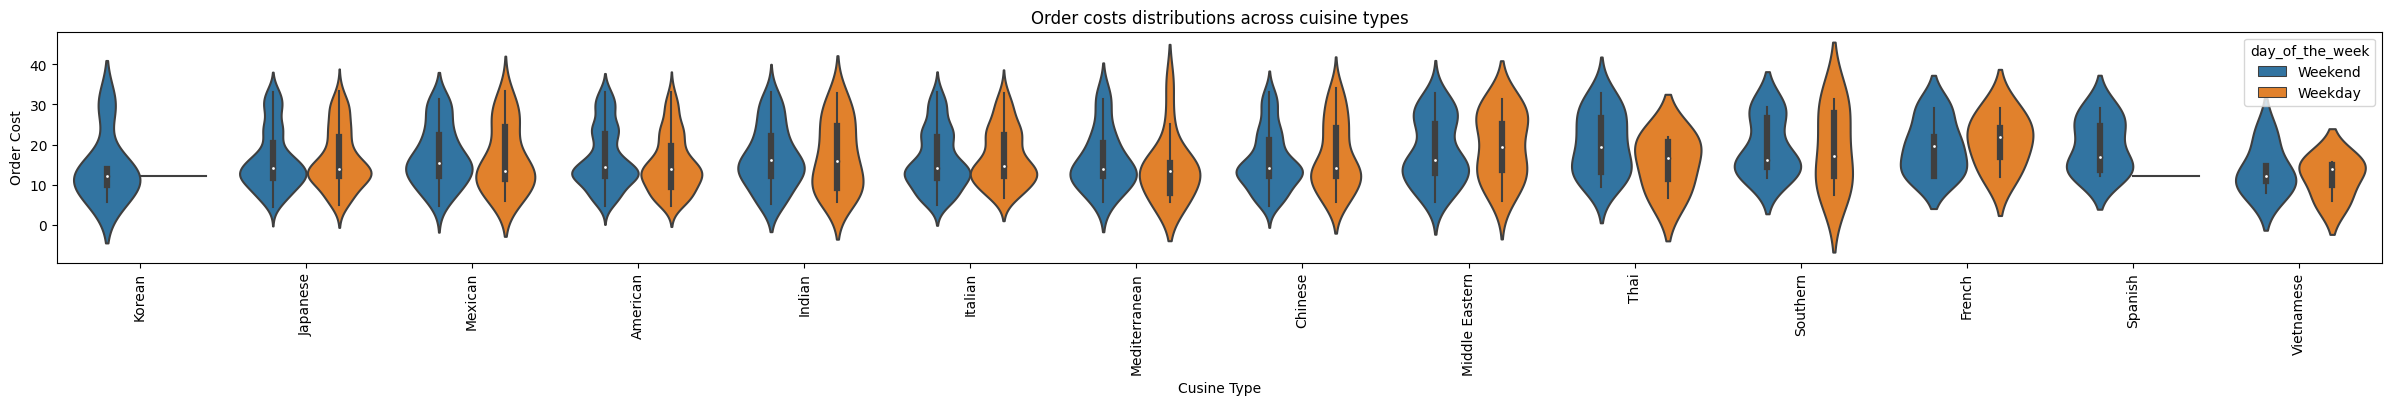

In [ ]:
plt.figure(figsize = (30,3))
plt.title("Order costs distributions across cuisine types")
plt.xticks(rotation = 90)
sns.violinplot(data = df, x='cuisine_type', y='cost_of_the_order', hue = 'day_of_the_week')
plt.ylabel("Order Cost")
plt.xlabel("Cusine Type")
plt.show()

Observation:

Based on the output of the data we can see that there are variations across the average order cost for each of the cuisine types. French food ordered on a week day has a high average order cost vs. Mexican food ordered on a week day has a low average order cost.

We can also see that within each cuisine type, the time of the day of the week affects the distribution of order costs.

Text(0, 0.5, 'Preparation Time')

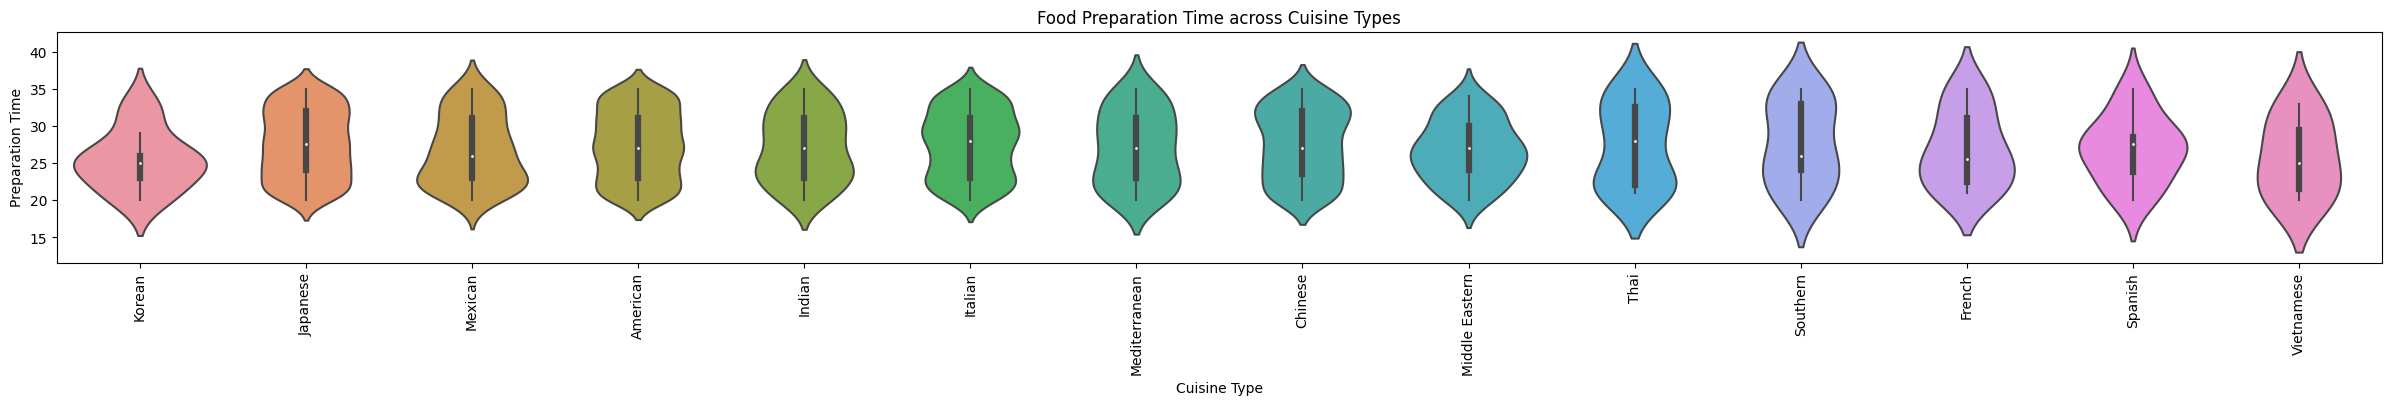

In [ ]:
plt.figure(figsize = (30,3))
plt.title("Food Preparation Time across Cuisine Types")
plt.xticks(rotation = 90)
sns.violinplot(data = df, x='cuisine_type', y='food_preparation_time')
plt.xlabel('Cuisine Type')
plt.ylabel('Preparation Time')

Observations:

Based on the data we can see that although the average preparation time is generally between 25 and 30 minutes, the distribution of preparation times varies across the different types of cuisines.

<ipython-input-100-25ea950e3c3e>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  sns.lineplot(


Text(0, 0.5, 'Order Cost')

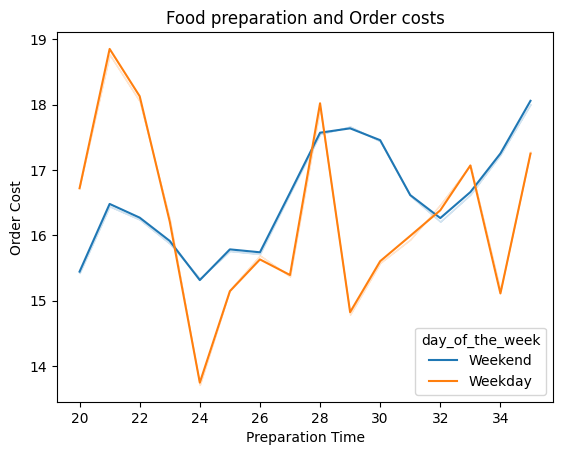

In [ ]:
plt.title('Food preparation and Order costs')
sns.lineplot(
    data=df,
    x='food_preparation_time',
    y= 'cost_of_the_order',
    hue = 'day_of_the_week',
    ci=False)
plt.xlabel('Preparation Time')
plt.ylabel('Order Cost')

Observations:

Based on the graph above we can see the effect of order costs and their respective preparation times. For weekdays, there is no clear effect of food preparation time on the order costs.
For weekends we can see a slight trend that as food preparation time increases, cost of orders increase. This may be an indication that restaurants are more efficient on the weekends since we would expect that higher cost foods would require more preparation time, which we do not see on the week days.

Text(0, 0.5, 'Preparation Time')

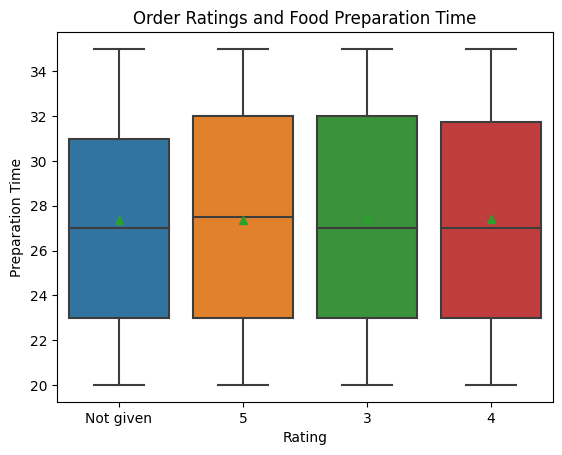

In [117]:
plt.title('Order Ratings and Food Preparation Time')
sns.boxplot(
    data=df,
    y='food_preparation_time',
    x= 'rating',
    showmeans = True)
plt.xlabel('Rating')
plt.ylabel('Preparation Time')

Based on the above chart we can see that there is little effect of food preparation time on the rating of the order. The medians across ratings do not vary significantly, in fact, 5 star ratings have a higher median preparation time that the others which means customers are waiting longer to receive their food. However, this could be further reviewed to understand if that time is being used to prepare a higher-quality meal.

Total time of delivery and preparation time could also be a better indication to see the effect of customer waiting time on the order ratings.

Text(0, 0.5, 'Delivery Time')

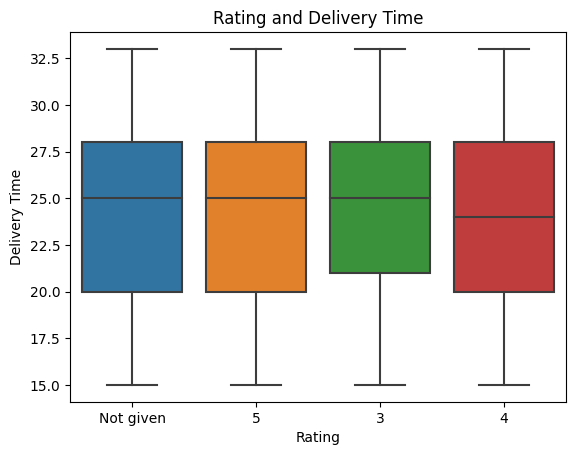

In [ ]:
plt.title('Rating and Delivery Time')
sns.boxplot(
    data=df,
    y='delivery_time',
    x= 'rating')
plt.xlabel('Rating')
plt.ylabel('Delivery Time')

In the plot above we can see that the median delivery time does is also similar across ratings, however, 4 star ratings have a lower median that the other ratings. This could median that customers have an increased perception of wait time from the moment that orders are picked up from the restaurant and delivered to their home. As previously noted, this may also be affected by external variables such as delivery distances.

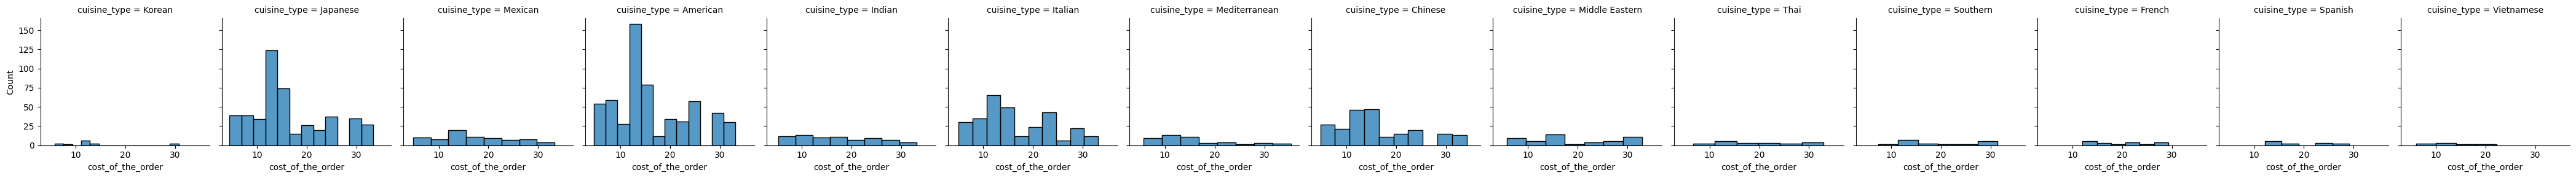

In [ ]:
g= sns.FacetGrid(df, col='cuisine_type')
g.map(sns.histplot,'cost_of_the_order')

Based on the graphs above, I was looking to understand the distribution of the costs across the different cuisine types. Interestingly, the distribution of the two most popular cuisines, American and Japanese, are quite similar which could me more of an indication of cost being a factor of customer price preferences as opposed to the cuisine type.

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer

In [ ]:
df_rating = df[df['rating']!='Not given'] # create a data frame that does not include Not givens
df_rating['rating'] = df_rating['rating'].astype('int') #change values to integers
df_rating.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1162 entries, 2 to 1896
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1162 non-null   int64  
 1   customer_id            1162 non-null   int64  
 2   restaurant_name        1162 non-null   object 
 3   cuisine_type           1162 non-null   object 
 4   cost_of_the_order      1162 non-null   float64
 5   day_of_the_week        1162 non-null   object 
 6   rating                 1162 non-null   int64  
 7   food_preparation_time  1162 non-null   int64  
 8   delivery_time          1162 non-null   int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 90.8+ KB


<ipython-input-81-9969086ad7cf>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rating['rating'] = df_rating['rating'].astype('int')


In [ ]:
avgratings = df_rating.groupby('restaurant_name')['rating'].mean().reset_index() #create a new variable of average ratinngs
values = df_rating['restaurant_name'].value_counts().reset_index() #create a new variable of restaurant count
values.rename(columns={'index':'restaurant_name', 'restaurant_name':'rating_count'},inplace=True)

In [ ]:
df_rating = df_rating.merge(avgratings, on='restaurant_name') # add the new average variable
df_rating = df_rating.merge(values, on='restaurant_name') # add the new count variable

In [ ]:
df_rating.rename(columns={'rating_x':'rating', 'rating_y':'mean_rating'},inplace=True)
df_rating

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,mean_rating,rating_count
0,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28,4.272727,11
1,1476820,152786,Cafe Habana,Mexican,31.38,Weekend,4,23,27,4.272727,11
2,1476753,195723,Cafe Habana,Mexican,13.97,Weekday,3,34,28,4.272727,11
3,1477196,50123,Cafe Habana,Mexican,4.85,Weekend,5,28,22,4.272727,11
4,1477500,152786,Cafe Habana,Mexican,14.07,Weekend,4,26,21,4.272727,11
...,...,...,...,...,...,...,...,...,...,...,...
1157,1477454,210544,DespaÌ±a,Spanish,16.06,Weekend,5,21,17,5.000000,1
1158,1477149,102710,Rye House,American,12.13,Weekday,4,26,30,4.000000,1
1159,1477910,39702,Frank Restaurant,Italian,12.08,Weekday,4,20,31,4.000000,1
1160,1476843,361846,Sarabeth's West,American,14.12,Weekday,3,21,33,3.000000,1


In [ ]:
promo = df_rating[df_rating['mean_rating']>4] #find the restaurants with mean rating >4
promo[promo['rating_count']>50]['restaurant_name'].value_counts() #find mean rating >4 and counts >50

Shake Shack                  133
The Meatball Shop             84
Blue Ribbon Sushi             73
Blue Ribbon Fried Chicken     64
Name: restaurant_name, dtype: int64

#### Observations:


### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders

In [ ]:
greater = df[df['cost_of_the_order']>20]['cost_of_the_order'].sum() *.25 #find the charges to restuarants that have cost >20
less = df.loc[(df['cost_of_the_order']<=20)& (df['cost_of_the_order']>5)]['cost_of_the_order'].sum() *.15 #find the chargest to restaurants with cost <20

greater+less #add the two costs above for the total net revenue

6166.303

#### Observations:


### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered)

In [ ]:
df['total_time'] = df['food_preparation_time']+df['delivery_time'] #create new variable adding delivery and prep time
g60 = df[df['total_time']>60]['total_time'].value_counts().sum() # sum the restaurants with time >60
g60 / df.value_counts().sum() # find the percent

0.1053740779768177

#### Observations:


### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends?

In [ ]:
weekend_delivery = df[df['day_of_the_week']=='Weekend']['delivery_time'].mean() # find the mean delivery time on weekend
week_delivery = df[df['day_of_the_week']=='Weekday']['delivery_time'].mean() # find the mean delivery time on weekend

print(weekend_delivery)
print(week_delivery)

22.4700222057735
28.340036563071298


#### Observations:

The weekend average delivery time is 22.47 vs. the weekday average delivery time is 28.34 minutes. The weekend mean delivery time is faster than the weekday mean delivery time. This could be an indication that maybe there are more people working on the weekends to deliver shortening the perimeter that each delivery worker has to travel to drop off food. There could also be the effect of greater traffic during the week around meal times.

Text(0, 0.5, 'Rating')

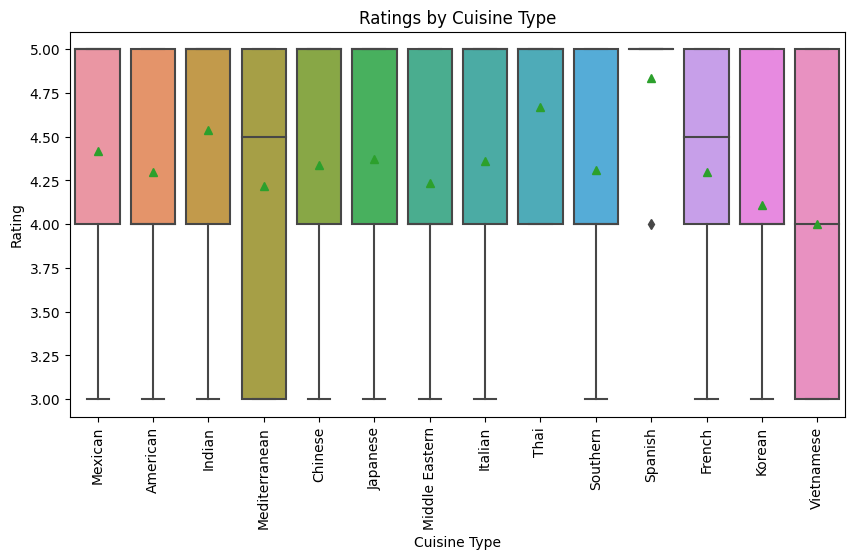

In [115]:
plt.figure(figsize=(10,5))
plt.title('Ratings by Cuisine Type')
sns.boxplot(
    data=df_rating,
    y='rating',
    x= 'cuisine_type',
    showmeans = True)
plt.xticks(rotation=90)
plt.xlabel('Cuisine Type')
plt.ylabel('Rating')

### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations)

### Conclusions:
Based on the analysis we can see the following conclusions:
* Customers have a strong preference for delivery of American and Japanese Cuisines
* Customers are placing more orders on the weekends than on the weekdays
* Customers order more low cost orders (<20) as opposed to higher cost orders



### Recommendations:

*  Add more restaurants for American and Japanese restaurants spread out around the city. Ensuring that there are food options that cater to our primary customer preferences in all areas of the city will allow food delivery times to stay low and increase the volume of orders. Customers are disproportionately ordering these cuisines, which may be a combination of comfort food and quality maintenance during travel. Increasing availability of these options will entice customers to continue to order more of the food that they love with the delivery benefit that Food Hub offers.
* Increase marketing campaigns to draw in customers during the week. Implementing marketing campaigns and discounts during the week can help FoodHub grow its business as the majority of the sales are being completed over the two day weekend as opposed to the 5 day week. Helping customers create habits of using FoodHub during the week will allow them to create a sustainable revenue stream during the week, even at the cost of short-term discounts and marketing campaigns.
* Understanding that there is a higher amount of orders that are lower in costs, I think there are two recommendations that should be made:
  1. Work with restaurants to reduce costs / prepartion times of low cost orders
  2. Work to incentivize customers to place higher cost orders

  Given the data that is collected by FoodHub there is an opportunity to work with the restaurants to reduce costs and preparation times of low cost orders to make these products more efficient. Analyzing customer habits and forecasting the orders could give the restaurant kitchens a heads up on the volume that will likely be needed and help establish processes to make low cost order preparations faster. At the moment there is no clear correlation between the increasing costs of orders and increasing food preparation time. This means a lot of time is being used by kitchens to prepare orders that may fall in the low cost category.

  Helping to incentivize higher cost orders will also help FoodHub greatly increase their revenues as they tend to charge a higher service fee percentage to restaurants for higher cost orders.  


---